# 0. Imports

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# 1. Read Data

In [61]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

In [62]:
X_train, y_train = train.drop("is_goal", axis=1), train["is_goal"]
X_test, y_test = test.drop("is_goal", axis=1), test["is_goal"]

# 2. Get overview of data

In [63]:
train.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,player_id,under_pressure,shot_aerial_won,shot_one_on_one,shot_deflected,shot_open_goal,shot_redirect,off_camera,shot_follows_dribble,is_goal
0,6460,2520,2,00:16:49.978,61,49,Shot,124,Bayern Munich,Regular Play,...,8217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1784,2389,2,00:15:29.585,60,29,Shot,158,Hamburger SV,From Corner,...,40468,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1
2,793,164,1,00:03:47.549,3,47,Shot,12,Hannover 96,Regular Play,...,131141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,7641,237,1,00:08:35.834,8,35,Shot,19,Augsburg,From Keeper,...,8807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1232,1148,1,00:25:09.280,25,9,Shot,54,Borussia Dortmund,From Counter,...,5559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [64]:
train.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_key_pass_id', 'shot_type', 'shot_first_time', 'shot_technique',
       'shot_body_part', 'shot_freeze_frame', 'possession_team_id', 'team_id',
       'player_id', 'under_pressure', 'shot_aerial_won', 'shot_one_on_one',
       'shot_deflected', 'shot_open_goal', 'shot_redirect', 'off_camera',
       'shot_follows_dribble', 'is_goal'],
      dtype='object')

In [65]:
train.shape

(6264, 35)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6264 non-null   int64  
 1   index                 6264 non-null   int64  
 2   period                6264 non-null   int64  
 3   timestamp             6264 non-null   object 
 4   minute                6264 non-null   int64  
 5   second                6264 non-null   int64  
 6   type                  6264 non-null   object 
 7   possession            6264 non-null   int64  
 8   possession_team       6264 non-null   object 
 9   play_pattern          6264 non-null   object 
 10  team                  6264 non-null   object 
 11  player                6264 non-null   object 
 12  position              6264 non-null   object 
 13  location              6264 non-null   object 
 14  duration              6264 non-null   float64
 15  related_events       

In [67]:
train.describe()

,id,index,period,minute,second,possession,duration,match_id,possession_team_id,team_id,player_id,is_goal
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6.264000e+03,6264.000000,6264.000000,6264.000000,6264.000000
mean,3900.055875,1889.427842,1.541028,47.993934,29.421296,101.837484,0.730841,3.890411e+06,251.252075,252.031609,14317.265326,0.106960
std,2269.611321,1010.943533,0.498354,26.213215,17.358590,54.603388,0.543518,8.819197e+01,216.699545,217.674334,37063.426073,0.309088
min,0.000000,23.000000,1.000000,0.000000,0.000000,2.000000,0.001107,3.890259e+06,169.000000,169.000000,2968.000000,0.000000
25%,1921.750000,1045.750000,1.000000,26.000000,14.000000,56.000000,0.320499,3.890335e+06,174.000000,174.000000,6337.000000,0.000000
50%,3918.500000,1926.000000,2.000000,49.000000,30.000000,103.000000,0.649438,3.890408e+06,179.000000,179.000000,8541.000000,0.000000
75%,5862.250000,2712.250000,2.000000,70.000000,44.000000,147.000000,1.024208,3.890486e+06,185.000000,185.000000,10594.000000,0.000000
max,7830.000000,4295.000000,2.000000,102.000000,59.000000,234.000000,5.620995,3.890564e+06,904.000000,904.000000,400984.000000,1.000000


# 3. Data visualization

### 3.1 Explore Distribution of target variable

<Axes: xlabel='is_goal', ylabel='count'>

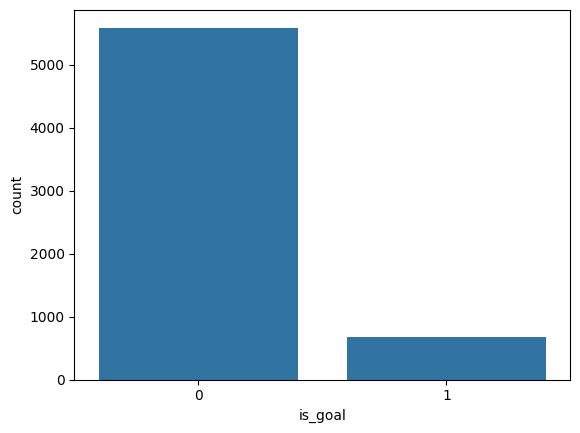

In [68]:
sns.countplot(data=train, x="is_goal")

### 3.2 Explore missing values

In [69]:
missing = train.isna().mean().sort_values(ascending=False)

missing[missing > 0]

shot_follows_dribble    0.999521
off_camera              0.998883
shot_redirect           0.996328
shot_open_goal          0.988985
shot_deflected          0.985792
shot_one_on_one         0.943008
shot_aerial_won         0.901820
under_pressure          0.682631
shot_first_time         0.677363
shot_key_pass_id        0.290868
shot_freeze_frame       0.010217
dtype: float64

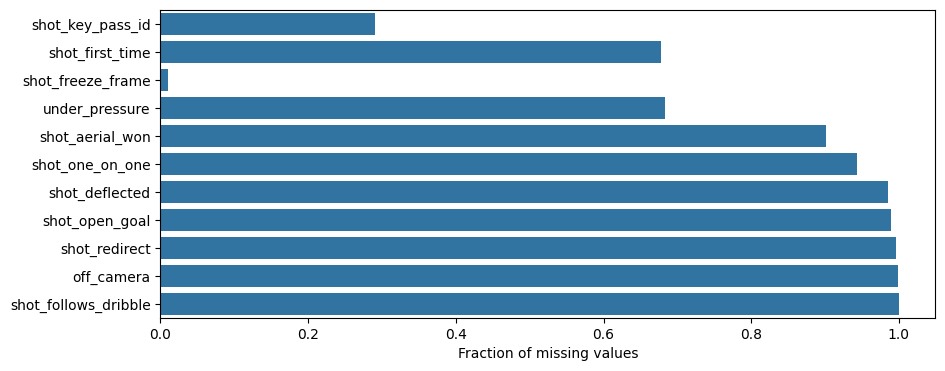

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

missing = train.isna().mean().reset_index()
missing.columns = ["feature", "missing_ratio"]
missing = missing[missing["missing_ratio"] > 0]

plt.figure(figsize=(10, 4))
sns.barplot(data=missing, x="missing_ratio", y="feature")
plt.xlabel("Fraction of missing values")
plt.ylabel("")
plt.show()


### 3.3 Explore when the most goals are scored

<Axes: xlabel='minute', ylabel='is_goal'>

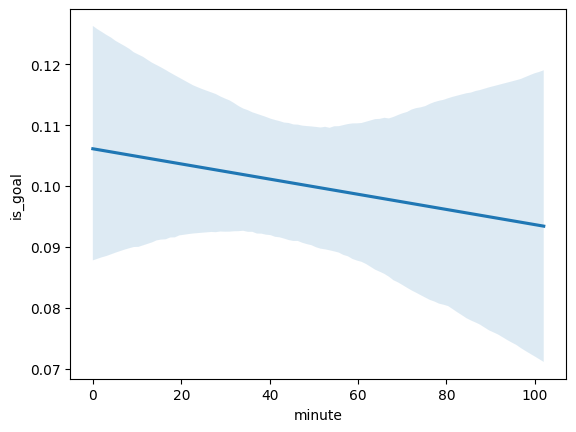

In [71]:
goal_rate = (
    train
    .groupby("minute", as_index=False)["is_goal"]
    .mean()
)

sns.regplot(
    data=goal_rate,
    x="minute",
    y="is_goal",
    scatter=False,
    ci=95
)

### 3.4 Visualize outliers with boxplots

In [ ]:
num_cols = train.select_dtypes(include="number").columns
num_cols

Index(['id', 'index', 'period', 'minute', 'second', 'possession', 'duration',
       'match_id', 'possession_team_id', 'team_id', 'player_id', 'is_goal'],
      dtype='object')

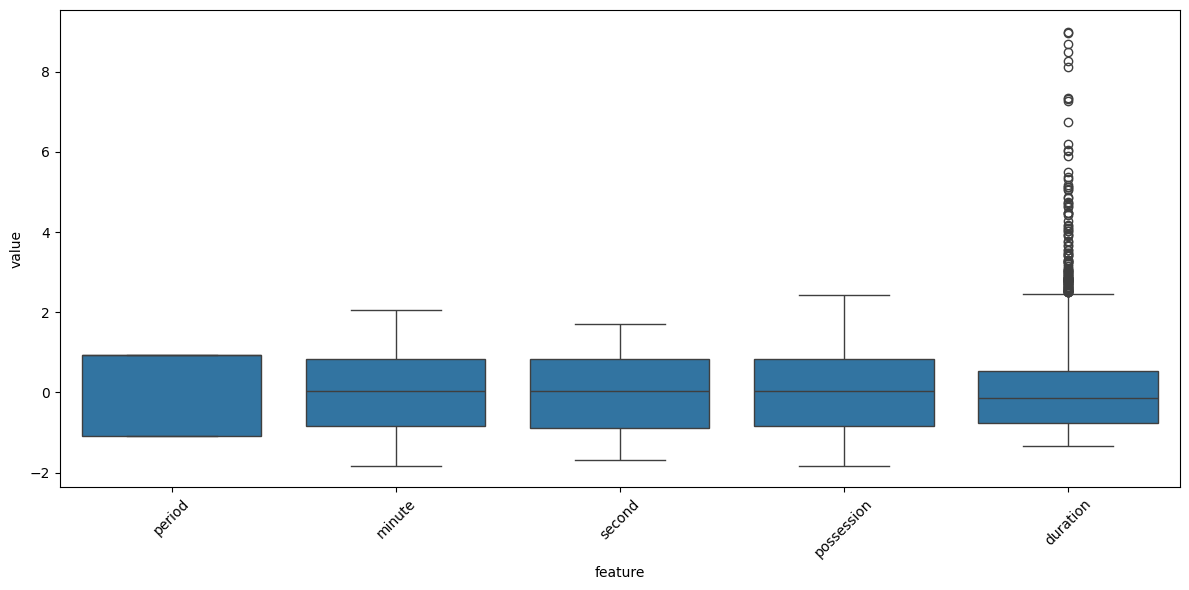

In [73]:
num_cols = train.select_dtypes(include="number").columns
exclude = ["is_goal", "id", "index", "possession_team_id", "team_id", "player_id", "match_id"]  # add IDs if needed

num_cols = [c for c in num_cols if c not in exclude]


X_num = train[num_cols]
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=num_cols,
    index=train.index
)


df_long = X_scaled.melt(var_name="feature", value_name="value")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_long, x="feature", y="value")
plt.xticks(rotation=45)
plt.tight_layout()
